In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/DL-project/

/content/drive/MyDrive/Github/DL-project


In [1]:
import re
import sys
import unittest
import importlib
from pathlib import Path
import matplotlib.pyplot as plt

from model import *

import torch
import torch.nn.functional as F

# Import tqdm if installed
try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x: x

In [2]:
verbose=True

def compute_psnr(x, y, max_range=1.0):
        assert x.shape == y.shape and x.ndim == 4
        return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y) ** 2).mean((1,2,3))).mean()


## Training

In [6]:
model = Model()
train_path="./data/train_data.pkl"
val_path = "./data/val_data.pkl"
train_input0, train_input1 = torch.load(train_path)
val_input, val_target = torch.load(val_path)

train_input0 = train_input0.float() / 255.0
train_input1 = train_input1.float() / 255.0
val_input = val_input.float() / 255.0
val_target = val_target.float() / 255.0

output_psnr_before = compute_psnr(val_input, val_target)
print(f"[PSNR before: {output_psnr_before:.2f} dB]")

model.train(train_input0, train_input1, verbose)


[PSNR before: 20.72 dB]


KeyboardInterrupt: ignored

## Loading pretrained model

In [3]:
model = Model()

In [4]:
model.load_pretrained_model(SAVE_PATH='./data/save.pth')

val_path = "./data/val_data.pkl"
val_input, val_target = torch.load(val_path)
val_input = val_input.float() / 255.0
val_target = val_target.float() / 255.0

else


In [5]:
torch.cuda.is_available()

False

In [6]:
mini_batch_size = 100
#Checker ici ce qu'il se passe avec model.predict()
model_outputs = model(val_input)

In [7]:
output_psnr_after = compute_psnr(model_outputs, val_target)

print(f"[PSNR: {output_psnr_after:.2f} dB]")

[PSNR: 24.81 dB]


In [8]:
model_outputs.shape

torch.Size([1000, 3, 32, 32])

## Plot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


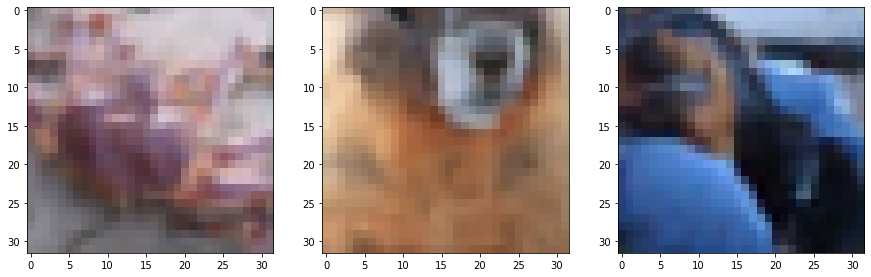

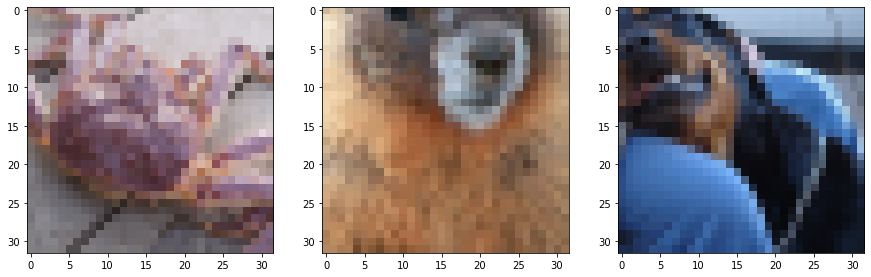

In [26]:
N = 3
plt.figure(figsize=(N*5,2*5))
for i, item in enumerate(model_outputs):
    if i >= N: break
    plt.subplot(2, N, i+1)
    item = item.permute((1,2,0))
    plt.imshow(item.detach().numpy())
plt.figure(figsize=(N*5,2*5))
for i, item in enumerate(val_target):
    if i >= N: break
    plt.subplot(2, N, i+1)
    item = item.permute((1,2,0))
    plt.imshow(item.detach().numpy())

## Git

In [14]:
!git add .

In [15]:
!git commit -m "weight save and load added"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@0e81871e8aa7.(none)')


In [17]:
  !git config --global user.email "louis.drame21@gmail.com"
  !git config --global user.name "ldrameColab"

In [18]:
!git add .

In [19]:
!git commit -m "weight save and load added"

[main fd9d56d] weight save and load added
 5 files changed, 11 insertions(+), 66 deletions(-)
 create mode 100644 __pycache__/model.cpython-37.pyc
 create mode 100644 __pycache__/taro.cpython-37.pyc
 create mode 100644 data/save.pth
 rewrite test.ipynb (100%)


In [20]:
!git push

Counting objects: 9, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (9/9), 166.05 KiB | 9.77 MiB/s, done.
Total 9 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/ldrame21/DL-project
   bd19f42..fd9d56d  main -> main
